In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.cbook import boxplot_stats

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA


from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm
import pylab as py


from scipy.stats import shapiro
from matplotlib.cm import ScalarMappable

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, fbeta_score, precision_recall_curve, roc_curve, roc_auc_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline


from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
%matplotlib inline


In [2]:


!pip install shap > None
import shap
from shap import Explainer
from shap.plots import beeswarm


Прогнозирование жизнеспособности пациентов с сердечной недостаточностью методами машинного обучения.


Прогнозирование жизнеспособности пациентов с сердечной недостаточностью является одной из наиболее важных задач в медицине. Сердечная недостаточность - это состояние, при котором сердце не может обеспечивать организм достаточным количеством крови, что может привести к серьезным осложнениям и даже смерти. Ранняя диагностика и прогнозирование риска смерти у пациентов с сердечной недостаточностью помогут сохранить жизни пациентов.

Методы машинного обучения предлагают новый подход к прогнозированию риска смерти пациентов с сердечной недостаточностью. Они позволяют анализировать большие объемы данных, включая клинические и лабораторные результаты, и выявлять закономерности и зависимости между признаками и результатом. Это может помочь врачам идентифицировать пациентов с высоким риском смерти и принять соответствующие меры для предотвращения осложнений.

В этом проекте будут использоваться методы машинного обучения для прогнозирования жизнеспособности пациентов с сердечной недостаточностью, такие как логистическая регрессия, метод k-ближайших соседей и метод случайного леса. Кроме того, будет использоваться библиотека SHAP для интерпретации полученной модели и определения наиболее важных признаков, влияющих на прогнозирование жизнеспособности.

Целью этого проекта является разработка надежной системы поддержки принятия решений для прогнозирования жизнеспособности пациентов с сердечной недостаточностью, которая может помочь врачам принять более информированные решения о лечении и уходе за пациентами.

# 1. Разведовательный анализ данных

Набор данных состоит из 13 различных дискретных, логических и непрерывных параметров 5000 различных пациентах c сердечной недостаточностью.

In [ ]:
path = 'heart_failure_clinical_records.csv'
df = pd.read_csv(path, sep = ",", index_col=False, header = 0, decimal = ".")



Датасет включает в себя характеристики, описываемые
*   логическими переменными (принимает значение "да" или "нет", 0 или 1):

1.   'anaemia' - анемия (снижение количества эритроцитов или гемоглобина);
2.   'diabetes' - наличие диабета;
3.   'high_blood_pressure' - наличие высокого кровяного давления;
4.   'smoking' - курит пациент или нет;
5.   'DEATH_EVENT' - смерть пациента в течение периода наблюдения.
6.   'sex' - пол (женщина или мужчина).

*  непрерывными  переменными:

1.   'ejection_fraction' - фракция выброса (процент крови, покидающей сердце при каждом сокращении);
2.   'platelets' - уровень тромбоцитов в крови (килотромбоциты/мл);
3.   'serum_creatinine' - уровень креатинина сыворотки крови (мг/дл);
4.   'serum sodium' - уровень сывороточного натрия в крови (мэкв/л).
5.   'creatinine_phosphokinase' - уровень фермента креатининфосфокиназа в крови (мкг/л)
6.   'age' - возраст пациента (в годах)
7.   'time' - период наблюдения (дни)


In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [ ]:
df.shape

(5000, 13)

In [ ]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


In [ ]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

Набор данных полный, отсутствуют пропуски.
Все переменные обладают необходимым типом данных для анализа.

<Axes: >

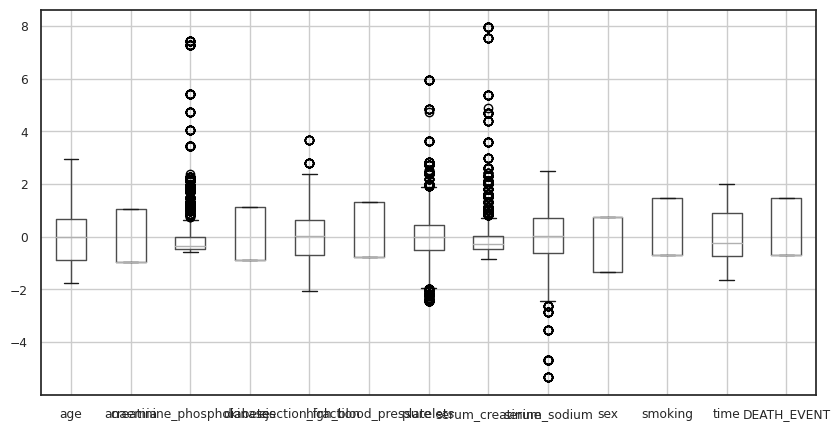

In [ ]:
standard_scaler = StandardScaler()
standard_df = pd.DataFrame(data = standard_scaler.fit_transform(df), index = df.index, columns = df.columns)
standard_df.boxplot(figsize=(10,5))

Значения данных имели различных порядок. Для удобства визуализации необходимо ,было стандартизировать данные.

Например, в исходных данных наблюдается значение тромбоцитов $8\cdot10^5$, хотя норма по разным источникам составляет не более $4\cdot10^5$. **Было принято решение оставить данные, выбивающиеся из нормы, т.к. исследовались люди с проблемами здоровья, поэтому логично ожидать у них значения выбивающиеся из нормы.**

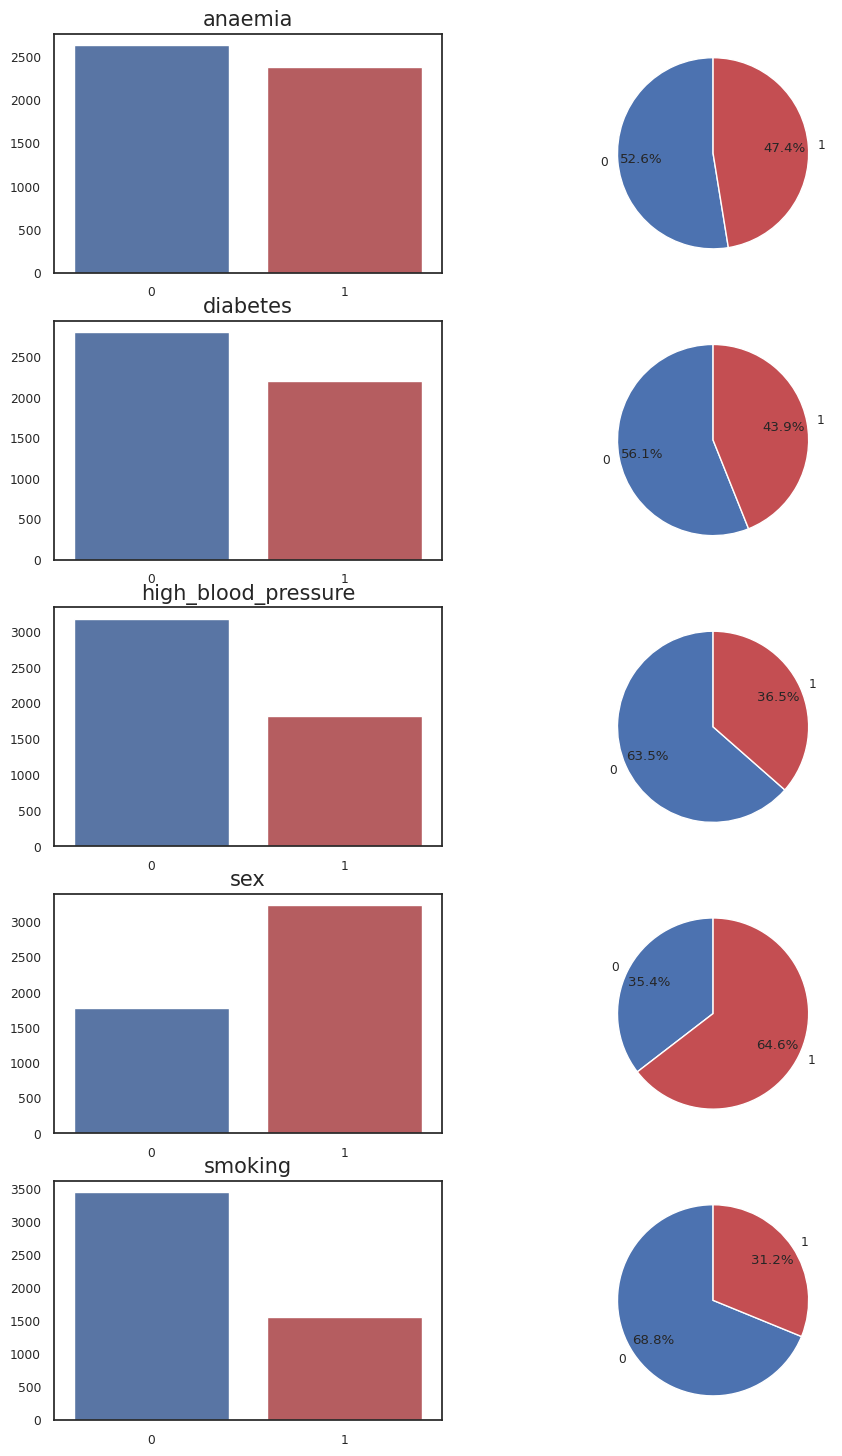

In [ ]:
cat_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

plt.figure(figsize=(11,18))
sns.set(font_scale=0.8)
sns.set_style("white")
clr1 = ["b", "r"]
i = 0; j = 1
for col in cat_cols:
    feature = df.groupby(col)[col].count()
    plt.subplot(5, 2, i+1)
    sns.barplot(x=feature.index, y=feature.values, palette=clr1)
    plt.title(col, fontsize=15)
    plt.xlabel("\n")
    plt.subplot(5, 2, j+1)
    plt.pie(x=feature.values, autopct="%.1f%%", pctdistance=0.75, labels=feature.index,
            startangle=90, colors=["b", "r"])
    plt.xlabel("\n")
    i += 2
    j += 2
plt.show()

По приведенным выше гистограммам **нельзя делать вывод**, например, что у мужчин сердечная недостаточность встречается чаще чем у женщин, что наличие курения или высокое кровяное давление  не вызывает сердечной недостаточности.

Такие выводы противоречат информации из открытых источников. Т.к. у курильщиков ["гораздо чаще, чем у некурящих развивается атеросклероз сосудов, артериальная гипертензия или даже сахарный диабет"](http://gp1-kbr.ru/patsientam/shkola-zdorovya/brosaj-kurit/kurenie-i-serdechnaya-nedostatochnost/#:~:text=%D0%9A%D1%83%D1%80%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%BF%D1%80%D0%BE%D0%B2%D0%BE%D1%86%D0%B8%D1%80%D1%83%D0%B5%D1%82%20%D0%BF%D0%BE%D1%8F%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5%20%D1%85%D1%80%D0%BE%D0%BD%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B9%20%D1%81%D0%B5%D1%80%D0%B4%D0%B5%D1%87%D0%BD%D0%BE%D0%B9,%D0%B3%D0%B8%D0%BF%D0%B5%D1%80%D1%82%D0%B5%D0%BD%D0%B7%D0%B8%D1%8F%20%D0%B8%D0%BB%D0%B8%20%D0%B4%D0%B0%D0%B6%D0%B5%20%D1%81%D0%B0%D1%85%D0%B0%D1%80%D0%BD%D1%8B%D0%B9%20%D0%B4%D0%B8%D0%B0%D0%B1%D0%B5%D1%82), да и в целом, врачи давно [знают](https://russjcardiol.elpub.ru/jour/article/view/4083/3084), что у пациентов, страдающих сердечной недостаточностью, наиболее часто встречаются хронические заболевания:  
*   Повышенное АД (гипертония),
*   Нарушение сердечного ритма,
*   Повышение уровня холестерина,
*   Заболевания легких,
*   Диабет,
*   Анемия.

Приведенные выше гистограммы лишь показывают то, какие участники были выбраны для наблюдения и были занесены в данный датасет.

### Выбор метрики и категориальная переменная



Категориальная переменная единственная (DEATH_EVENT) и принимает бинарные значения (1 или 0).


In [ ]:
# df=df_cleaned

In [ ]:
target = 'DEATH_EVENT'

cat_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
num_cols = list(set(df.columns) - set([*cat_cols, target]))
df_num=df[num_cols]
df_cat=df[cat_cols]
len(cat_cols), len(num_cols)

(5, 7)

In [ ]:
target_cols = df[target] #select_dtypes(include='object')
target_cols.describe()


count    5000.000000
mean        0.313600
std         0.464002
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: DEATH_EVENT, dtype: float64

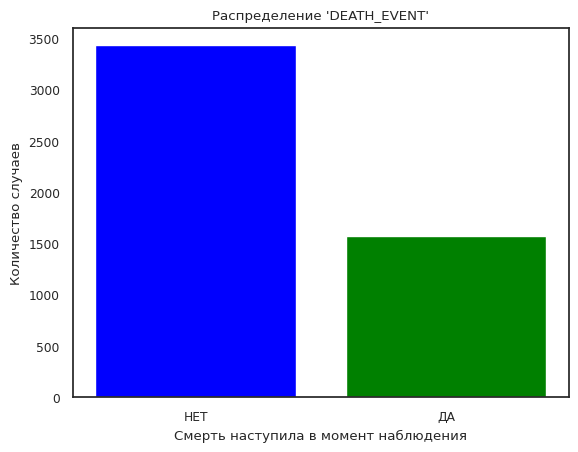

In [ ]:
counts = [len(target_cols)-sum(target_cols), sum(target_cols)]
plt.bar(['НЕТ', 'ДА'], counts, color=['blue', 'green'])
plt.xlabel('Смерть наступила в момент наблюдения')
plt.ylabel('Количество случаев')
plt.title('Распределение \'DEATH_EVENT\'')
plt.show()

Данный датасет можно использовать, например, для задачи классификации (задача определить погибнет ли человек во время наблюдения или нет).
Поясню на примере.

Представим, что человек обладает сердечной недостаточностью. Он хочет, сдав анализы, узнать, выживают ли пациенты в среднем с такими анализами или нет.

Бинарная характеристика несбалансирована, что не позволяет использовать метрику точности (Accuracy). В таком случае будет предпочительней использовать другие метрики, такие как Precision и Recall, F1-мера.

При этом нужно понимать смысл которые будут давать метрики Precision и Recall.

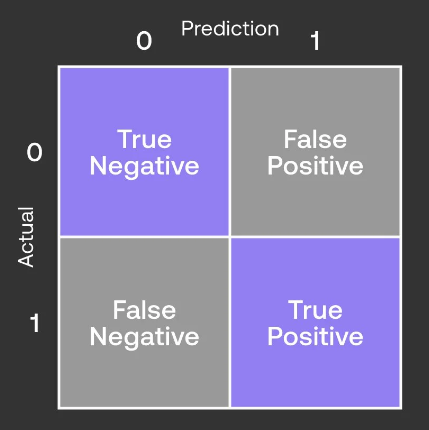

Вводится 2 метрики Precision и Recall.

Precision показывает долю правильно предсказанных классификатором элементов класса 1 (Positive) по отношению ко всем элементам класса 1, предсказнных классификатором. Другими словами это отношение количества верно предсказанных, положительных элементов к количеству всех положительных элементов предсказнных классификатором.
$$Precision=\frac{TP}{TP+FP} $$
Recall показывает долю элементов класса 1 (Positive), которая была верно предсказана. Другими словами это отношение количества верно предсказанных классификатором положительных элементов к количеству всех положительных элементов.
$$Recall=\frac{TP}{TP+FN} $$
В данной задаче нам нужно спасти жизнь пациента, поэтому предпочтительнее отправить большее количество людей на дополнительную диагностику. Если классификатор будет иметь меньший Precision, тогда большее количество людей, которые здоровы, будет определяться классификатором как те, кто погибнет ('DEATH_IVENT' = 1 ), и тем самым их отправят на дополнительное лечение.
С другой стороны если человек будет классифицирован как тот, кто выживет ('DEATH_IVENT' = 0 ), но он погибнет, то это будет негативным результатом. Поэтому в $F_{1\beta}$ мере следует отдать предпочтение Recall.

### Зависимость смертности от остальных параметров здоровья

In [ ]:
df_num[target]=df[target]

### Распределение числовых характеристик

Посмотрим на распределения характеристик и проверим их на принадлежность к нормальному распределению

In [ ]:
df_num.columns

Index(['serum_creatinine', 'time', 'platelets', 'creatinine_phosphokinase',
       'ejection_fraction', 'serum_sodium', 'age', 'DEATH_EVENT'],
      dtype='object')

<Axes: xlabel='serum_creatinine', ylabel='Density'>

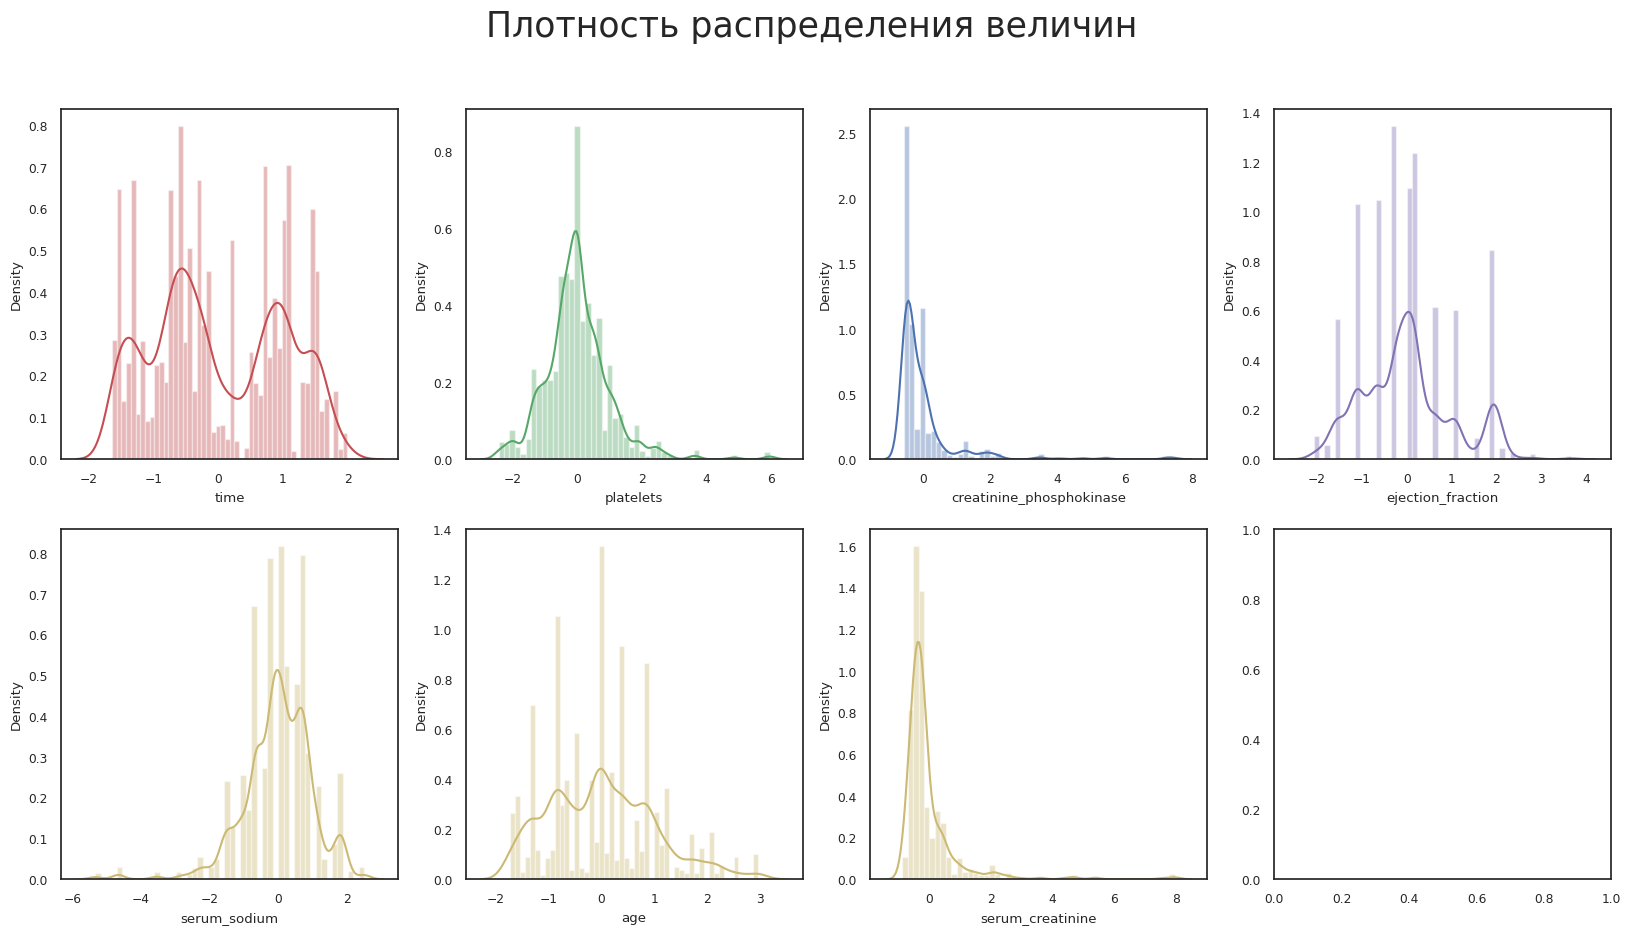

In [ ]:
standard_df2=standard_df
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Плотность распределения величин', fontsize=25)
sns.distplot(standard_df2[df_num.columns[1]], bins=50, color='r', ax=axes[0, 0])
sns.distplot(standard_df2[df_num.columns[2]], bins=50, color='g', ax=axes[0, 1])
sns.distplot(standard_df2[df_num.columns[3]], bins=50, color='b', ax=axes[0, 2])
sns.distplot(standard_df2[df_num.columns[4]], bins=50, color='m', ax=axes[0, 3])
sns.distplot(standard_df2[df_num.columns[5]], bins=50, color='y', ax=axes[1, 0])
sns.distplot(standard_df2[df_num.columns[6]], bins=50, color='y', ax=axes[1, 1])
sns.distplot(standard_df2[df_num.columns[0]], bins=50, color='y', ax=axes[1, 2])


Из всех параметров только 'serum_creatine' и 'creatine_phosphokinase' выглядит похожими на нормальное распределние.

In [ ]:
from scipy.stats import shapiro
for  i in range(1,8):
  print("p_value = "+str(round(shapiro(df[df_num.columns[i]]).pvalue,3))+' для '+str(df_num.columns[i]))



p_value = 0.0 для time
p_value = 0.0 для platelets
p_value = 0.0 для creatinine_phosphokinase
p_value = 0.0 для ejection_fraction
p_value = 0.0 для serum_sodium
p_value = 0.0 для age
p_value = 0.0 для DEATH_EVENT


Для проверки на нормальность можно воспользоваться статистическим методом, например, критерием Шапиро-Уилка.

Используя критерий Шапиро-Уилка, для всех параметров здоровья величина $\text{p-value} $ оказывается меньше порогового значения ($\text{p-value}<0.05$), следовательно **нулевая гипотеза о принадлежности выборок к нормальному распределению отвергается**.


### Матрица корреляций

In [ ]:
num2=df[df.columns[1:]]
plt.figure(figsize=(10,10))
corr_matrix = num2.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')
#sns.heatmap(num_cols.corr(), cmap="RdYlBu_r");

,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
anaemia,1.000000,-0.181922,0.002214,0.023465,0.047172,-0.046343,0.032343,0.020723,-0.081526,-0.105996,-0.111049,0.054508
creatinine_phosphokinase,-0.181922,1.000000,-0.019987,-0.021007,-0.045821,0.024809,-0.004032,0.051404,0.069679,-0.014294,-0.013789,0.079706
diabetes,0.002214,-0.019987,1.000000,-0.049101,-0.034712,0.072198,-0.019072,-0.107393,-0.153649,-0.167046,0.027454,-0.011273
ejection_fraction,0.023465,-0.021007,-0.049101,1.000000,0.021474,0.060289,-0.038473,0.212627,-0.112841,-0.021421,0.068472,-0.292702
high_blood_pressure,0.047172,-0.045821,-0.034712,0.021474,1.000000,0.048044,-0.007362,0.065884,-0.089096,-0.025762,-0.183450,0.094023
platelets,-0.046343,0.024809,0.072198,0.060289,0.048044,1.000000,-0.005178,0.041101,-0.095209,0.065018,-0.001025,-0.031521
serum_creatinine,0.032343,-0.004032,-0.019072,-0.038473,-0.007362,-0.005178,1.000000,-0.229683,0.042409,0.003029,-0.190489,0.311281
serum_sodium,0.020723,0.051404,-0.107393,0.212627,0.065884,0.041101,-0.229683,1.000000,-0.053848,-0.013830,0.109712,-0.227355
sex,-0.081526,0.069679,-0.153649,-0.112841,-0.089096,-0.095209,0.042409,-0.053848,1.000000,0.434621,-0.008616,0.055604
smoking,-0.105996,-0.014294,-0.167046,-0.021421,-0.025762,0.065018,0.003029,-0.013830,0.434621,1.000000,-0.013660,0.009397


<Figure size 1000x1000 with 0 Axes>

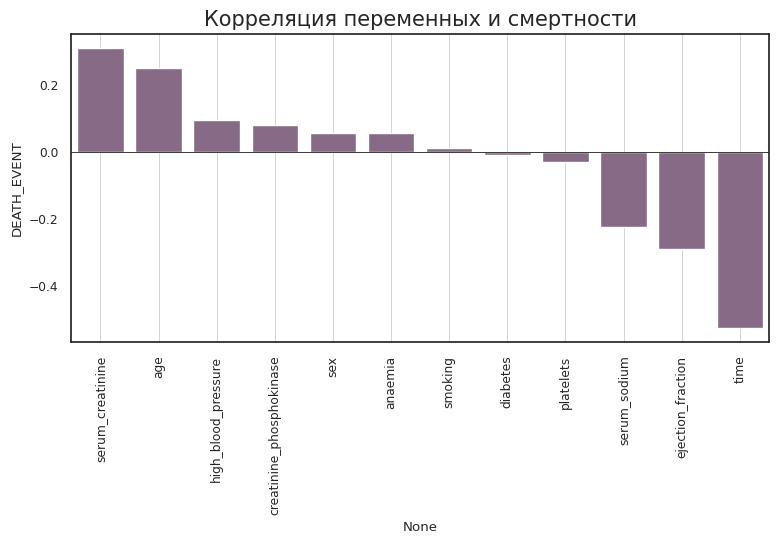

In [ ]:
death_corr = df.corr()["DEATH_EVENT"]
death_corr = death_corr.drop("DEATH_EVENT", axis=0).sort_values(ascending=False)
plt.figure(figsize=(9,4))
sns.set_style("white")
sns.barplot(x=death_corr.index, y=death_corr, color="#8b658b")
plt.xticks(rotation=90)
plt.axhline(0, color="k", lw=0.6)
plt.grid(True, axis="x", lw=0.6)
plt.title("Корреляция переменных и смертности", fontsize=15)
plt.show()

Корреляция отсутствует между характеристиками в большинстве случаев, однако некоторые значения в таблице достигают значений -0.2 и -0.3. Так наиболее скореллированными параметрами с 'DEATH_EVENT' являются 'serum_cratine' и 'ejection fraction' (уровень креатина в крови и фракция выброса).

Из-за отсутствия зависимости между данными можно в качестве таргерта использовать 'DEATH_IVENT' для задачи классификации.


### Визуализация при помощи PCA
Посмотрим получится ли классифицировать выживаемость пациента в 2-мерном и 3-мерном пространствах.

In [ ]:
df_num.columns[7]

'DEATH_EVENT'

In [ ]:
df_new = df[df_num.columns[:6]]
scaler = StandardScaler()
dfs=scaler.fit_transform(df_new)

In [ ]:
model = PCA(n_components=2)
model.fit(dfs)
pca_coords = model.transform(dfs)
#pca_coords[:5]

In [ ]:
#df_class=df[num_cols.columns[1]]
df_class=df[df_num.columns[7]]

In [ ]:
df_to_draw = pd.DataFrame({
    'class': df_class,
    'pca1': pca_coords[:, 0],
    'pca2': pca_coords[:, 1],
})

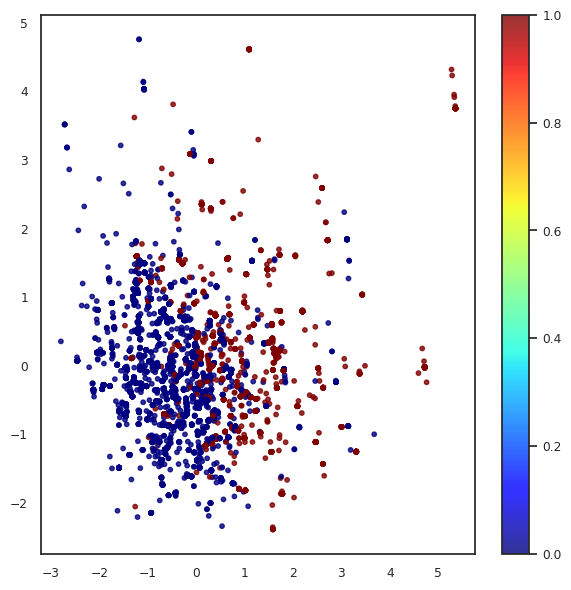

In [ ]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

plt.scatter(pca_coords[:, 0], pca_coords[:, 1],
            c=df_class, cmap='jet', s=10, alpha = 0.8)
plt.colorbar()
plt.show()

3D

In [ ]:
model = PCA(n_components=3)
model.fit(dfs)
pca_coords = model.transform(dfs)
#pca_coords[:5]

In [ ]:
df_to_draw = pd.DataFrame({
    'class': df_class,
    'pca1': pca_coords[:, 0],
    'pca2': pca_coords[:, 1],
    'pca3': pca_coords[:, 2],
})

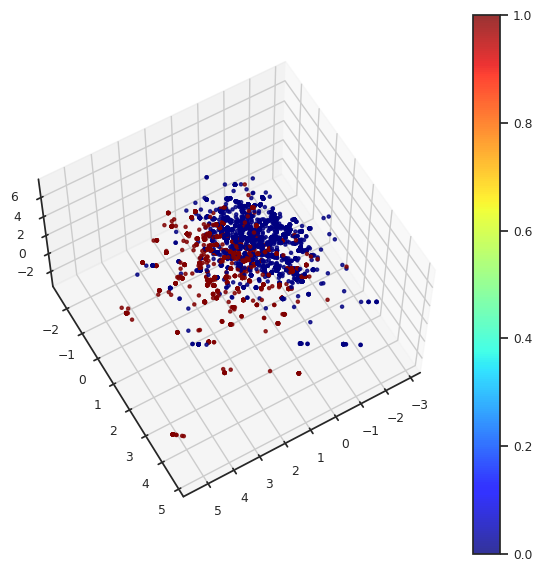

In [ ]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=60, azim=60)
p=ax.scatter(pca_coords[:, 0], pca_coords[:, 1], pca_coords[:, 2],
            c=df_class, cmap='jet', s=5, alpha = 0.8)
fig.colorbar(p)

plt.show()


Данные сильно перемешаны в 2-ом и 3-мерном пространстве. Отделить данные наглядным образом нельзя.

# Модель и проверка качества по метрикам

###Классификаторы
Сравним классификаторы:
*   Dummy Classifier
*   Logistic Regression
*   Random Forest
*   KNN

По метрикам:
*   Accuracy
*   F-мера
*   AUC ROC

(Обоснование использование метрики Accuracy и F-меры написано ввыше в пункте "Выбор метрики и категориальная переменная")

Разобьем датасет на две части:
1.   Информация об анализах пациента
2.   Информация о смерти пациента и выберем оттуда тестовую выборку - 1/4 от всего датасета


In [ ]:
target = 'DEATH_EVENT'

num_cols = list(set(df.columns) - set([target]))
df1=df[num_cols]
df2=df[target]

In [ ]:
y = df2
x = df1
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=2024, test_size=0.25,stratify=y)

In [ ]:
scaler = StandardScaler()
X_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns
)
X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns
)

####DummyClassifier
 Присваивает всем объектам принадлежность к наиболее частому встречающемуся классу

In [ ]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train);
y_pred_dummy = dummy_clf.predict(X_test)

####Логистическая регрессия

In [ ]:
log_reg = LogisticRegression(random_state=2024)
log_reg.fit(X_train, y_train);
y_pred_log_reg = log_reg.predict(X_test)
y_pred_lg = log_reg.predict_proba(X_test)[:, 1]

####RandomForest

In [ ]:
# Random forest classifier
rf_model = RandomForestClassifier(random_state=2024)
rf_model.fit(X_train,y_train)

# predict
y_pred_rf = rf_model.predict(X_test)
y_pred_rf2 = rf_model.predict_proba(X_test)[:, 1]

####KNN

In [ ]:
kn_model=KNeighborsClassifier()
kn_model.fit(X_train,y_train)

# predict
y_pred_kn = kn_model.predict(X_test)
y_pred_kn2 = kn_model.predict_proba(X_test)[:, 1]

###Проверка качества
Проверим наши классификаторы в соответствии с описанными выше метриками.

#### Accuracy

In [ ]:
print(f'Accuracy для Dummy Classificator : {accuracy_score(y_test, y_pred_dummy)}')
print(f'Accuracy для Logistic regression : {accuracy_score(y_test, y_pred_log_reg)}')
print(f'Accuracy для Random Forest : {accuracy_score(y_test, y_pred_rf)}')
print(f'Accuracy для KNeighbour : {accuracy_score(y_test, y_pred_kn)}')

Accuracy для Dummy Classificator : 0.6864
Accuracy для Logistic regression : 0.8448
Accuracy для Random Forest : 0.9928
Accuracy для KNeighbour : 0.9696


In [ ]:
print(f'Recall для Dummy Classificator: {recall_score(y_test, y_pred_dummy)}')
print(f'Recall для Logistic regression: {recall_score(y_test, y_pred_log_reg)}')
print(f'Recall для Random Forest: {recall_score(y_test, y_pred_rf)}')
print(f'Recall для KNeighbour: {recall_score(y_test, y_pred_kn)}')

Recall для Dummy Classificator: 0.0
Recall для Logistic regression: 0.6964285714285714
Recall для Random Forest: 0.9795918367346939
Recall для KNeighbour: 0.9285714285714286


In [ ]:
print(f'Precision для Dummy Classificator: {precision_score(y_test, y_pred_dummy)}')
print(f'Precision для Logistic regression: {precision_score(y_test, y_pred_log_reg)}')
print(f'Precision для Random Forest: {precision_score(y_test, y_pred_rf)}')
print(f'Precision для KNeighbour: {precision_score(y_test, y_pred_kn)}')

Precision для Dummy Classificator: 0.0
Precision для Logistic regression: 0.7844827586206896
Precision для Random Forest: 0.9974025974025974
Precision для KNeighbour: 0.9732620320855615


#### F-мера
Для сравнения классификаторов будем использовать F-меру
$$ F_{\beta}=(\beta^2+1)\frac{\text{Recall} \cdot \text{Precision}
}{\text{Recall} +\beta^2  \text{Precision} }$$

В случае, когда $\beta = 1$ precision и recall имеют одинаковый вклад в метрику. При $0 < \beta < 1$ больший вклад имеет precision, при $\beta > 1$ - recall.

Выберем $\beta = 2$  

In [ ]:
print(f'Fbeta-score для Dummy Classificator: {fbeta_score(y_test, y_pred_dummy, beta=2)}')
print(f'Fbeta-score для Logistic regression: {fbeta_score(y_test, y_pred_log_reg, beta=2)}')
print(f'Fbeta-score для Random Forest: {fbeta_score(y_test, y_pred_rf, beta=2)}')
print(f'Fbeta-score для KNeighbour: {fbeta_score(y_test, y_pred_kn, beta=2)}')

Fbeta-score для Dummy Classificator: 0.0
Fbeta-score для Logistic regression: 0.7124217118997912
Fbeta-score для Random Forest: 0.9831029185867896
Fbeta-score для KNeighbour: 0.937178166838311



#### ROC-кривая

Вводится 2 метрики TPR и FPR.

TPR показывает долю элементов класса 1 (Positive), которая была верно предсказана. Другими словами это отношение количества верно предсказанных, положительных элементов к количеству всех положительных элементов

$$TPR=\frac{TP}{P}=\frac{TP}{TP+FN} $$
FPR показывает долю элементов класса 0 (Negative), которая была неверно предсказана. Другими словами это отношение количества неверно предсказанных, положительных элементов к количеству всех негативных элементов
$$FPR=\frac{FP}{N}=\frac{FP}{FP+TN} $$

ROC - кривая зависимости TPR(FPR).
О том, как строится ROC кривая, написано в [статье](https://alexanderdyakonov.wordpress.com/2017/07/28/auc-roc-%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C-%D0%BF%D0%BE%D0%B4-%D0%BA%D1%80%D0%B8%D0%B2%D0%BE%D0%B9-%D0%BE%D1%88%D0%B8%D0%B1%D0%BE%D0%BA/)


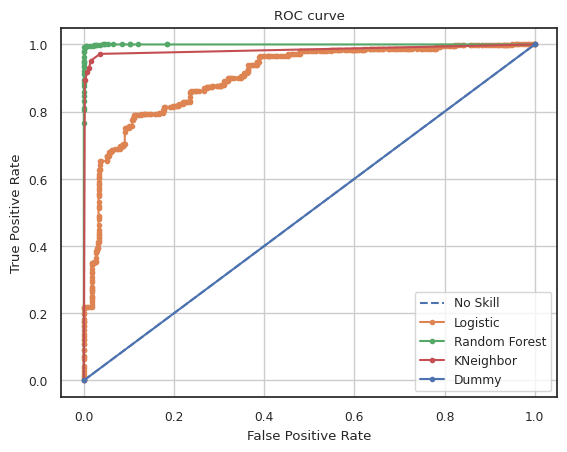

In [ ]:
y_pred = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lg)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf2)
fpr_kn, tpr_kn, thresholds_kn = roc_curve(y_test, y_pred_kn2)
fpr_d, tpr_d, thresholds_d = roc_curve(y_test, y_pred_dummy)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.plot(fpr_rf, tpr_rf, marker='.', c='g', label='Random Forest')
plt.plot(fpr_kn, tpr_kn, marker='.', c='r', label='KNeighbor')
plt.plot(fpr_d, tpr_d, marker='.', c='b', label='Dummy')
#plt.plot(fpr,-fpr+2*np.sqrt(fpr), label='Lineary distribution')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.grid()
plt.show()


In [ ]:
print(f'AUC ROC для Dummy Classificator: {roc_auc_score(y_test,y_pred_dummy)}')
print(f'AUC ROC для Logistic Regression: {roc_auc_score(y_test,y_pred_lg)}')
print(f'AUC ROC для Random Forest : {roc_auc_score(y_test,y_pred_rf)}')
print(f'AUC ROC для KNeighbour : {roc_auc_score(y_test,y_pred_kn)}')


AUC ROC для Dummy Classificator: 0.5
AUC ROC для Logistic Regression: 0.9041107701821987
AUC ROC для Random Forest : 0.9892131677845963
AUC ROC для KNeighbour : 0.9584582084582084


Метод Random Forest дает наилучшие показатели по метрикам  Accuracy, F1-beta, AUC ROC при сравнении с другими методами Logistic Regression, KNN и Dummy Classificator.

#Выявление наилучших гиперпараметров


1. Оптимизировать гиперпараметры моделей, используя RandomizedSearchCV.

2. Сравнить классификаторы (Logistic Regression, KNeighborsClassifier, Random Forest) с наилучшими для каждой модели параметрами:
*   на тренировочных данных (для оценки качества обучаемости);
*   на тестовых данных (для оценки предсказательной способности).
3. Выявить наиболее важные параметры модели.  

## Pipelines и параметры

In [ ]:
KNN_pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier()),
    ]
)

KNN_params = {
    'scaler__with_mean': [True, False],
    'knn__n_neighbors': [1,2,3,4,5,6,7,8,9,10],
    'knn__weights': ['uniform', 'distance'],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'knn__p': [1,2],
}

KNN = RandomizedSearchCV(
    estimator=KNN_pipeline,
    param_distributions=KNN_params,
    n_iter=10,
    cv=10,
    random_state=2024,
    n_jobs=2,
    verbose=1,
)

In [ ]:
RFC_pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("rf", RandomForestClassifier()),
    ]
)


RFC_params = {
    'scaler__with_mean': [True, False],
    'rf__n_estimators': np.linspace(5, 300, 25).astype(int),
    'rf__criterion': ['gini', 'entropy', 'log_loss'],
    'rf__max_depth': np.linspace(1, 10, 10).astype(int),
    'rf__min_samples_split': np.linspace(2, 5, 4).astype(int),
    'rf__random_state': [2024],
}


RFC = RandomizedSearchCV(
    estimator=RFC_pipeline,
    param_distributions=RFC_params,
    n_iter=10,
    cv=10,
    random_state=2023,
    n_jobs=2,
    verbose=1,
)

In [ ]:
LR_pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression()),
    ]
)

LR_params = {
    'scaler__with_mean': [True, False],
    'clf__C': np.linspace(0.01, 1, 10),
    'clf__penalty': ['l2', 'l1','elasticnet' ,'none'],
    'clf__random_state': [2023],
}



LR = RandomizedSearchCV(
    estimator=LR_pipeline,
    param_distributions=LR_params,
    n_iter=10,
    cv=10,
    random_state=2023,
    n_jobs=2,
    verbose=1,
)

##Подбор гиперпараметров

In [ ]:
KNN.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('knn', KNeighborsClassifier())]),
                   n_jobs=2,
                   param_distributions={'knn__algorithm': ['auto', 'ball_tree',
                                                           'kd_tree', 'brute'],
                                        'knn__n_neighbors': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'knn__p': [1, 2],
                                        'knn__weights': ['uniform', 'distance'],
                                        'scaler__with_mean': [True, False]},
                   random_state=2024, verbose=1)

In [ ]:
LR.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('clf', LogisticRegression())]),
                   n_jobs=2,
                   param_distributions={'clf__C': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]),
                                        'clf__penalty': ['l2', 'l1',
                                                         'elasticnet', 'none'],
                                        'clf__random_state': [2023],
                                        'scaler__with_mean': [True, False]},
                   random_state=2023, verbose=1)

In [ ]:
RFC.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('rf', RandomForestClassifier())]),
                   n_jobs=2,
                   param_distributions={'rf__criterion': ['gini', 'entropy',
                                                          'log_loss'],
                                        'rf__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'rf__min_samples_split': array([2, 3, 4, 5]),
                                        'rf__n_estimators': array([  5,  17,  29,  41,  54,  66,  78,  91, 103, 115, 127, 140, 152,
       164, 177, 189, 201, 213, 226, 238, 250, 263, 275, 287, 300]),
                                        'rf__random_state': [2024],
                                        'scaler__with_mean': [True, False]},
                   random_state=2023, verbose=1)

##Проверка качества моделей

###На тренировочных данных

In [ ]:
y_lr = LR.best_estimator_.predict(X_train)
y_proba_lr = LR.best_estimator_.predict_proba(X_train)[:, 1]
print('LogisticRegression')
print(classification_report(y_train, y_lr))


y_rfc = RFC.best_estimator_.predict(X_train)
y_proba_rfc = RFC.best_estimator_.predict_proba(X_train)[:, 1]
print('RandomForest')
print(classification_report(y_train, y_rfc))


y_knn = KNN.best_estimator_.predict(X_train)
y_proba_knn = KNN.best_estimator_.predict_proba(X_train)[:, 1]
print('KNeighbor')
print(classification_report(y_train, y_knn))

LogisticRegression
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      2574
           1       0.80      0.68      0.73      1176

    accuracy                           0.84      3750
   macro avg       0.83      0.80      0.81      3750
weighted avg       0.84      0.84      0.84      3750

RandomForest
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2574
           1       1.00      0.98      0.99      1176

    accuracy                           0.99      3750
   macro avg       1.00      0.99      0.99      3750
weighted avg       0.99      0.99      0.99      3750

KNeighbor
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2574
           1       1.00      1.00      1.00      1176

    accuracy                           1.00      3750
   macro avg       1.00      1.00      1.00      3750
weighted avg       1.00      1.0

In [ ]:
print(f'Accuracy для Logistic regression : {accuracy_score(y_train, y_lr)}')
print(f'Accuracy для Random Forest : {accuracy_score(y_train, y_rfc)}')
print(f'Accuracy для KNeighbor : {accuracy_score(y_train, y_knn)}')

round_count=7

print("\n")
print(f'Fbeta-score для Logistic regression: {round(fbeta_score(y_train, y_lr, beta=0.5) ,round_count)}')
print(f'Fbeta-score для Random Forest: {round(fbeta_score(y_train, y_rfc, beta=0.5) ,round_count)}')
print(f'Fbeta-score для KNeighbor: {round(fbeta_score(y_train, y_knn, beta=0.5) ,round_count)}')

Accuracy для Logistic regression : 0.8445333333333334
Accuracy для Random Forest : 0.9949333333333333
Accuracy для KNeighbor : 0.9997333333333334


Fbeta-score для Logistic regression: 0.7699767
Fbeta-score для Random Forest: 0.9967264
Fbeta-score для KNeighbor: 0.9998298


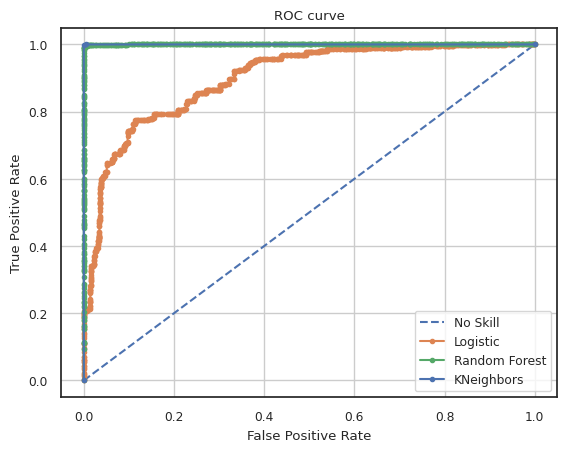

AUC ROC for Logistic Regression: 0.8999702
AUC ROC for Random Forest : 0.9998637
AUC ROC for KNeighbors : 0.9999982


In [ ]:

fpr_lr, tpr_lr, thresholds = roc_curve(y_train, y_proba_lr)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train, y_proba_rfc)
fpr_knn, tpr_knn, thresholds_d = roc_curve(y_train, y_proba_knn)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr_lr, tpr_lr, marker='.', label='Logistic')
plt.plot(fpr_rf, tpr_rf, marker='.', c='g', label='Random Forest')
plt.plot(fpr_knn, tpr_knn, marker='.', c='b', label='KNeighbors')
#plt.plot(fpr,-fpr+2*np.sqrt(fpr), label='Lineary distribution')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.grid()
plt.show()


print(f'AUC ROC for Logistic Regression: {round(roc_auc_score(y_train,y_proba_lr),round_count)}')
print(f'AUC ROC for Random Forest : {round(roc_auc_score(y_train,y_proba_rfc),round_count)}')
print(f'AUC ROC for KNeighbors : {round(roc_auc_score(y_train,y_proba_knn),round_count)}')


Проверка метода KNN на тренировочных данных излишняя, т.к. метод запоминает просто запоминает все точки. Например, при "n_neighbors=1" метод будет работать идеально.

Следует отметить, что высокие метрики у Random Forest могут сигналиизировать о береобученности полученной модели, в случае если на тестовых данных будет низкий результат.


###На тестовых данных

In [ ]:
y_lr = LR.best_estimator_.predict(X_test)
y_proba_lr = LR.best_estimator_.predict_proba(X_test)[:, 1]
print('LogisticRegression')
print(classification_report(y_test, y_lr))


y_rfc = RFC.best_estimator_.predict(X_test)
y_proba_rfc = RFC.best_estimator_.predict_proba(X_test)[:, 1]
print('RandomForest')
print(classification_report(y_test, y_rfc))


y_knn = KNN.best_estimator_.predict(X_test)
y_proba_knn = KNN.best_estimator_.predict_proba(X_test)[:, 1]
print('KNeighbor')
print(classification_report(y_test, y_knn))

LogisticRegression
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       858
           1       0.81      0.69      0.74       392

    accuracy                           0.85      1250
   macro avg       0.84      0.81      0.82      1250
weighted avg       0.85      0.85      0.85      1250

RandomForest
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       858
           1       1.00      0.98      0.99       392

    accuracy                           0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250

KNeighbor
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       858
           1       0.99      0.97      0.98       392

    accuracy                           0.99      1250
   macro avg       0.99      0.98      0.99      1250
weighted avg       0.99      0.9

In [ ]:
print(f'Accuracy для Logistic regression : {accuracy_score(y_test, y_lr)}')
print(f'Accuracy для Random Forest : {accuracy_score(y_test, y_rfc)}')
print(f'Accuracy для KNeighbor : {accuracy_score(y_test, y_knn)}')

round_count=4

print("\n")
print(f'Fbeta-score для Logistic regression: {round(fbeta_score(y_test, y_lr, beta=0.5) ,round_count)}')
print(f'Fbeta-score для Random Forest: {round(fbeta_score(y_test, y_rfc, beta=0.5) ,round_count)}')
print(f'Fbeta-score для KNeighbor: {round(fbeta_score(y_test, y_knn, beta=0.5) ,round_count)}')

Accuracy для Logistic regression : 0.8512
Accuracy для Random Forest : 0.992
Accuracy для KNeighbor : 0.988


Fbeta-score для Logistic regression: 0.782
Fbeta-score для Random Forest: 0.9933
Fbeta-score для KNeighbor: 0.9875


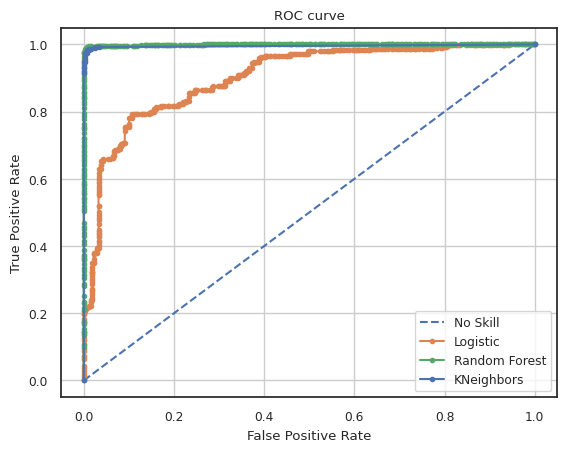

AUC ROC для Logistic Regression: 0.9043
AUC ROC для Random Forest : 0.9989
AUC ROC для KNeighbors : 0.9958


In [ ]:
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, y_proba_lr)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rfc)
fpr_knn, tpr_knn, thresholds_d = roc_curve(y_test, y_proba_knn)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr_lr, tpr_lr, marker='.', label='Logistic')
plt.plot(fpr_rf, tpr_rf, marker='.', c='g', label='Random Forest')
plt.plot(fpr_knn, tpr_knn, marker='.', c='b', label='KNeighbors')
#plt.plot(fpr,-fpr+2*np.sqrt(fpr), label='Lineary distribution')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.grid()
plt.show()


print(f'AUC ROC для Logistic Regression: {round(roc_auc_score(y_test,y_proba_lr),round_count)}')
print(f'AUC ROC для Random Forest : {round(roc_auc_score(y_test,y_proba_rfc),round_count)}')
print(f'AUC ROC для KNeighbors : {round(roc_auc_score(y_test,y_proba_knn),round_count)}')


Следует отметить, что RandomizeSearch выбирался из не всех доступных параметров для методов Random Forest и KNeighbors. Однако, при выборе даже таких меняющихся параметров удалось улучшить метрики каждого из алгоритмов.

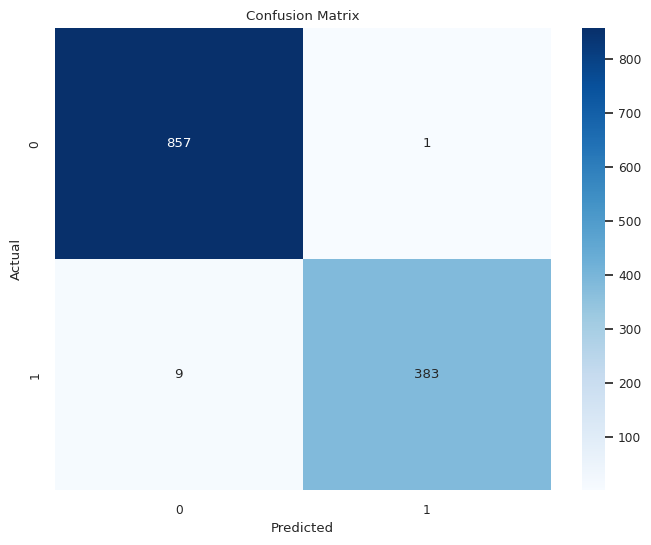

In [ ]:
conf_matrix = confusion_matrix(y_test, y_rfc)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Random Forest позволяет предсказывать практически безошибочно выживаемость пациента при сердечной недостаточности. Но следует отметить, что случаев, когда человеку был ошибочно определен положительный прогноз (выживет), больше чем случаев, когда человек ошибочно определен с отрицательным прогнозом (умрет).



#Интерпретация полученной модели

RandimizeSearcCV улучшает значение метрик для каждой из модели.
Метод Random Forest обладает наилучшими показателями по всем метрикам (Accuracy, F1, AUC ROC) при проверке на тестовых данных.

In [ ]:
RFC.best_estimator_

Pipeline(steps=[('scaler', StandardScaler(with_mean=False)),
                ('rf',
                 RandomForestClassifier(criterion='log_loss', max_depth=9,
                                        min_samples_split=3, n_estimators=41,
                                        random_state=2024))])

In [ ]:
# # Random forest classifier
rf_model = RandomForestClassifier(criterion='log_loss', max_depth=9, min_samples_split=3,
                       n_estimators=41, random_state=2024)
rf_model.fit(X_train,y_train)

RandomForestClassifier(criterion='log_loss', max_depth=9, min_samples_split=3,
                       n_estimators=41, random_state=2024)

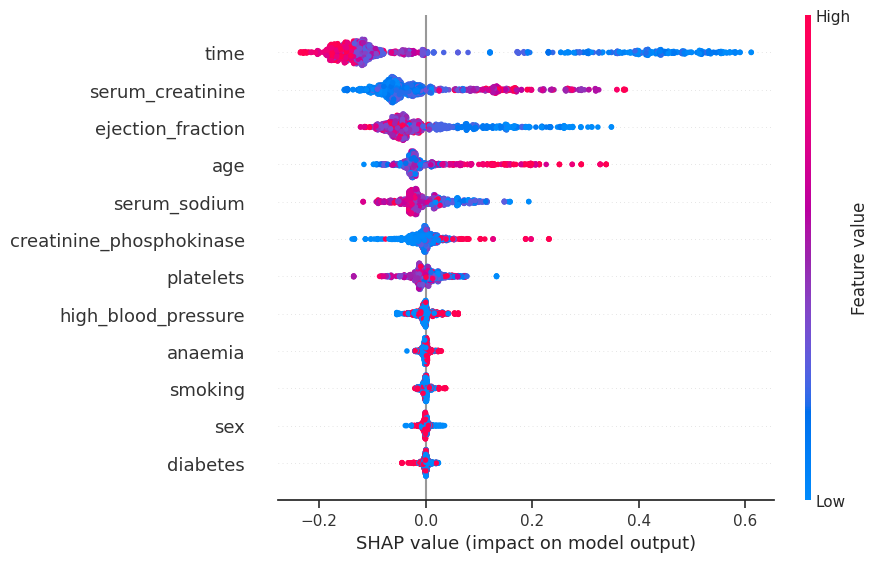

In [ ]:
explainer = Explainer(rf_model)
sv = explainer(X_test)
beeswarm(sv[:,:,1], max_display=20)

#Вывод

Проведен разведочный анализ данных для датасета. В датасете наблюдаются значения, выбивающиеся как из принятых норм здоровья, так и из вероятностного распределения данных датасета, но они являются логичными, т.к. наблюдаются люди с отклонениями в здоровье. Явные корреляции между характеристиками не выявлены, однако наиболее скоррелированными параметрами с таргетом 'DEATH_IVENT' были serum_creatinine и ejection_fraction, что согласуется с похожим [исследованием](https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records).

Проведена проверка на нормальность распределения характеристик. Все непрерывные характеристики не распределены нормально.

Обучены классификаторы и проведен сравнительный анализ их предсказательной способности по метрикам.
Метод Random Forest дает наилучшие показатели по метрикам  Accuracy, F1-beta, AUC ROC при сравнении с другими методами (KNN, Logistic Regression и Dummy Classificator).

При помощи библиотеки shap наглядно продемонстрировано влияние признаков в каждом случае на выживаемость пациента. Опишем влияние первых 3 параметров, учитывая, где находится в среднем каждый из параметров на шкале "SHAP Value":
*   уровень креатина в крови (чем значение ниже, тем выживаемость больше);
*   фракция выброса (чем значение выше, тем выживаемость больше);
*   уровень сывороточного натрия (чем он выше, тем смертность ниже).

Данные про креатин и фракцию выброса согласуются с [исследованием](https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records). Cледует отметить, что повышенный уровень натрия способствует [развитию сердечной недостаточности](https://internist.ru/publications/detail/dvoynaya-antiagregantnaya-terapiya-pri-ostrom-ishemicheskom-insulte-tia-polza-i-riski-na-protyazheni/), однако полученная модель показывает, что он также способствует выживаемости человека.
